### 데이터 구성 현황
- 손상 컨테이너: 대각면 각도 사진만 추출 - 배경 있는 것, 없는 것 혼합 (272장)
- 정상 컨테이너: 대각면 각도 사진만 추출 - 배경 있는 것, 없는 것 혼합 (531장)

### 현재 프로젝트 진행 현황
- 데이터 증가 작업: 완료 (추가가 필요하면 진행 예정)
- 사진 촬영: 정상 '컨' 완료(손상은 장소 섭외 불가능)
- CNN: RGB에 대하여 완료
- 전이학습 : VGG16, AlexNet, ResNet 각각 학습 및 진행 중 

# 0. 필요 라이브러리 불러오기
- 넘파이, 파이썬 이미지 라이브러리, IDG 등 불러오기

In [ ]:
import timeit
import io
import os
import numpy as np
import tensorflow as tf

from PIL import Image  # 파이썬 이미지 라이브러리
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
print("텐서플로우 버전 확인:", tf.__version__)
print("케라스 버전 확인:",tf.keras.__version__)

텐서플로우 버전 확인: 2.6.0
케라스 버전 확인: 2.6.0


In [ ]:
damage_con_path = "C:/Users/User/Downloads/211019_image_datas-20211027T023841Z-001/211019_image_datas/d_images/대각면"
damage_list = os.listdir(damage_con_path)
print("손상 대각면 사진 숫자:", len(damage_list))  # 

normal_con_path = "C:/Users/User/Downloads/211019_image_datas-20211027T023841Z-001/211019_image_datas/n_images/대각면"
normal_list = os.listdir(normal_con_path)
print("정상 대각면 사진 숫자:", len(normal_list))

x, y = len(damage_list), len(normal_list)
total = x+y
d_ratio = len(damage_list)/total*100
n_ratio = len(normal_list)/total*100

print("손상 사진 비율: {0:.2f}%, 정상 사진 비율: {1:.2f}%".format(d_ratio, n_ratio))

손상 대각면 사진 숫자: 272
정상 대각면 사진 숫자: 531
손상 사진 비율: 33.87%, 정상 사진 비율: 66.13%


# 1. 데이터 증가 작업

In [ ]:
# 데이터 증강작업에 필요한 라이브러리 불러오기
from numpy import expand_dims
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt

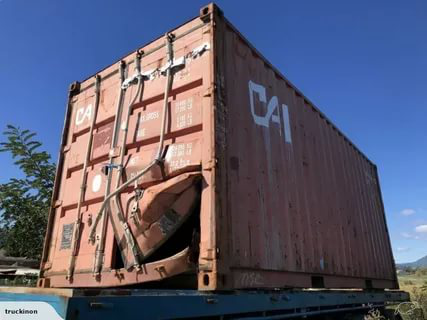

In [ ]:
# img = load_img('./d_angle/d_angle_001.jpg')
# img

- 이미지 증가를 위하여 직접 함수를 생성

   ① img_aug_witdth("파일명") : 이미지 데이터를 가로로 이동시켜 저장하는 함수
   
   ② img_aug_height("파일명") : 이미지 데이터를 세로로 이동시켜 저장하는 함수
   
   ③ img_aug_rotate("파일명") : 이미지 데이터를 일정 각도 회전시켜 저장하는 함수
   
   ※ 그 외의 기능인 뒤집기(flip), 확대(zoom), 밝기 변화(brightness)는 사용하지 않음
      ※ 질의사항: 증가 작업 중에서 어떤 것을 할 때, 효과가 좋을지?? 

In [ ]:
# 가로로 이동하는 함수
def img_aug_width(filename):
    img = load_img(filename)
    data = img_to_array(img)
    img_data = expand_dims(data, 0)
    data_gen = ImageDataGenerator(width_shift_range = 0.1)
    data_iter = data_gen.flow(img_data, 
                              batch_size = 2,
                              save_to_dir = './dataset', 
                              save_prefix = 'width_shift',
                              save_format = 'jpg' )
    batch = data_iter.next()
    image = batch[0].astype('uint16') 

# 세로로 이동하는 함수
def img_aug_height(filename):
    img = load_img(filename)
    data = img_to_array(img)
    img_data = expand_dims(data, 0)
    data_gen = ImageDataGenerator(height_shift_range = 0.1)
    data_iter = data_gen.flow(img_data, 
                              batch_size = 1,
                              save_to_dir = './dataset', 
                              save_prefix = 'height_shift',
                              save_format = 'jpg' )
    batch = data_iter.next()
    image = batch[0].astype('uint16')

# 회전하는 함수    
def img_aug_rotate(filename):
    img = load_img(filename)
    data = img_to_array(img)
    img_data = expand_dims(data, 0)
    data_gen = ImageDataGenerator(rotation_range = 30)
    data_iter = data_gen.flow(img_data, 
                              batch_size = 1,
                              save_to_dir = './dataset', 
                              save_prefix = 'rotate',
                              save_format = 'jpg' )
    batch = data_iter.next()
    image = batch[0].astype('uint16')

In [ ]:
x = range(0, len(damage_list), 3)
for i in x:
    img_aug_width('./d_angle/' + damage_list[i])
print("가로 변경 작업: {}회 반복".format(len(x)))

y = range(1, len(damage_list), 3)
for i in y:
    img_aug_height('./d_angle/' + damage_list[i])
print("세로 변경 작업: {}회 반복".format(len(y)))

z = range(2, len(damage_list), 3)
for i in z:
    img_aug_rotate('./d_angle/' + damage_list[i])
print("회전 변경 작업: {}회 반복".format(len(z)))
print("--------------------------")

sum_photos = len(x) + len(y) + len(z)
print("증가된 사진의 수: {}장".format(sum_photos))

가로 변경 작업: 91회 반복


In [ ]:
damage_list[271]

'd_angle_272.JPG'

In [ ]:
augment_damage_path = "./dataset"
augment_damage_list = os.listdir(augment_damage_path)
print("증가된 손상 대각면 사진 숫자: {}장".format(len(augment_damage_list)))

증가된 손상 대각면 사진 숫자: 271장


In [ ]:
augment_damage_list

['height_shift_0_1165.jpg',
 'height_shift_0_1221.jpg',
 'height_shift_0_1404.jpg',
 'height_shift_0_1571.jpg',
 'height_shift_0_1604.jpg',
 'height_shift_0_1786.jpg',
 'height_shift_0_1789.jpg',
 'height_shift_0_188.jpg',
 'height_shift_0_1892.jpg',
 'height_shift_0_1934.jpg',
 'height_shift_0_2101.jpg',
 'height_shift_0_2114.jpg',
 'height_shift_0_2290.jpg',
 'height_shift_0_2294.jpg',
 'height_shift_0_2406.jpg',
 'height_shift_0_2445.jpg',
 'height_shift_0_2505.jpg',
 'height_shift_0_2529.jpg',
 'height_shift_0_2695.jpg',
 'height_shift_0_2711.jpg',
 'height_shift_0_2723.jpg',
 'height_shift_0_2729.jpg',
 'height_shift_0_285.jpg',
 'height_shift_0_3016.jpg',
 'height_shift_0_3100.jpg',
 'height_shift_0_3229.jpg',
 'height_shift_0_3382.jpg',
 'height_shift_0_3383.jpg',
 'height_shift_0_3396.jpg',
 'height_shift_0_3506.jpg',
 'height_shift_0_3651.jpg',
 'height_shift_0_3740.jpg',
 'height_shift_0_3861.jpg',
 'height_shift_0_39.jpg',
 'height_shift_0_3951.jpg',
 'height_shift_0_396.jpg